# EU traffic deaths

&nbsp;

Notebook for https://narimiran.github.io/2016/10/02/eu-traffic.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
sns.set_palette('tab20', desat=0.8)

plt.rcParams['savefig.facecolor'] = (0, 0, 0, 0)
plt.rcParams['axes.facecolor'] = '#eee8d5'
plt.rcParams['figure.dpi'] = 70
plt.rcParams['ytick.alignment'] = 'center'

params = {'lw': 1,
          'width': 0.7,
          'sat': 0.80,
          'flier': 0,
          'c': '#268bd2',
          'size': 3,
         }

In [2]:
df_age = pd.read_csv('./datasets/tran_sf_roadag_1_Data_1.csv')
df_road = pd.read_csv('./datasets/tran_sf_roadro_1_Data_1.csv')
df_sex = pd.read_csv('./datasets/tran_sf_roadse_1_Data_1.csv')
df_user = pd.read_csv('./datasets/tran_sf_roadus_1_Data_1.csv')
df_pop = pd.read_csv('./datasets/demo_gind_1_Data_1.csv')

for df in [df_age, df_road, df_sex, df_user, df_pop]:
    df.replace(':', np.nan, inplace=True)
    index_2015 = df[df.TIME == 2015].index
    df.drop(index_2015, inplace=True)
    df['GEO'] = df.GEO.map(lambda x: x.split()[0] if 'Germany' in x else x)
    df['Value'] = df.Value.str.replace(',', '').astype(float)
    try:
        df.drop('UNIT', axis=1, inplace=True)
    except ValueError:
        df.drop('INDIC_DE', axis=1, inplace=True)
        df.rename(columns={'Value': 'Population'}, inplace=True)

In [3]:
p_sex = df_sex.pivot_table(index=['GEO', 'TIME'], 
                           columns='SEX', values='Value')
p_user = df_user.pivot_table(index=['GEO', 'TIME'], 
                             columns='ROADUSER', values='Value')
p_road = (df_road[~(df_road.TRA_INFR == 'Total')]
          .pivot_table(index=['GEO', 'TIME'], 
                       columns='TRA_INFR', values='Value'))
p_age = (df_age[~(df_age.AGE == 'Total')]
         .pivot_table(index=['GEO', 'TIME'], 
                      columns='AGE', values='Value'))
p_pop = df_pop.pivot_table(index=['GEO', 'TIME'], values=['Population'])

In [4]:
df = pd.merge(p_sex, p_user, left_index=True, right_index=True)

for table in [p_road, p_age, p_pop]:
    df = df.merge(table, left_index=True, right_index=True)

non_eu = ['Iceland', 'Liechtenstein', 'Norway', 'Switzerland']
missing = ['Bulgaria', 'Lithuania', 'Slovakia', 'Malta']

df.reset_index(inplace=True)
df = df[~(df.GEO.isin(non_eu)) & ~(df.GEO.isin(missing))]
df = df.set_index(['GEO', 'TIME'])

df['mf_ratio'] = df.Males / df.Females

In [5]:
df_mil = df.div(df.Population/1000000, axis=0)
df_mil.head(10)

Females      Males      Total     Driver  Passenger  \
GEO     TIME                                                          
Austria 2005  23.776547  69.866470  93.643017  66.330470  15.485238   
        2006  23.018311  65.420463  88.438775  60.695652  14.416732   
        2007  19.437439  63.986602  83.424041  57.225753  13.159509   
        2008  20.462232  61.266331  81.728563  57.775714  11.675509   
        2009  18.596274  57.348510  75.944784  50.389904  13.437308   
        2010  17.122379  48.972400  66.094779  44.781608   9.578954   
        2011  16.477289  45.969249  62.446538  42.626031   9.432651   
        2012  18.196693  44.956537  63.153230  44.480806   9.038880   
        2013  13.369838  40.464466  53.834304  38.334757   5.797540   
        2014  13.518455  37.028813  50.547268  37.028813   5.172279   

              Pedestrian  Motorways  Rural roads  Urban roads  \
GEO     TIME                                                    
Austria 2005   11.827308  10.851860    58.161093    24.630064   
        2006   13.326391   8.965026    55.243947    24.229801   
        2007   13.038779   8.933978    53.603870    20.886193   
        2008   12.277339   8.545991    50.433384    22.749188   
        2009   12.117572   7.318534    47.870409    20.755841   
        2010   11.734218   7.064478    42.147395    16.882906   
        2011   10.387856   5.492430    40.357419    16.596690   
        2012    9.633544   5.946632    39.247770    17.958828   
        2013    9.702006   3.667832    36.560000    13.606472   
        2014    8.346177   4.231864    31.856534    14.458870   

              65 years or over  From 15 to 17 years  From 18 to 24 years  \
GEO     TIME                                                               
Austria 2005         18.411583             5.852689            17.070342   
        2006         18.899245             4.240215            15.628222   
        2007         17.505768             3.863342            16.298474   
        2008         20.702964             3.129518            16.129054   
        2009         19.076178             3.479303            11.877620   
        2010         16.763169             3.232897            12.213166   
        2011         17.910097             2.865616             9.074449   
        2012         18.315626             2.854383             9.990341   
        2013         16.801036             1.656440             6.625760   
        2014         13.518455             1.880829             6.935555   

              From 25 to 49 years  From 50 to 64 years  Less than 15 years  \
GEO     TIME                                                                 
Austria 2005            36.091579            13.168549            3.048275   
        2006            31.135295            15.749371            2.786427   
        2007            30.665277            13.521697            1.569483   
        2008            26.480536            13.842098            1.444393   
        2009            27.474495            12.237548            1.799639   
        2010            21.313172            11.375007            1.197369   
        2011            19.581706            11.462462            1.552208   
        2012            18.553491            12.487927            0.951461   
        2013            17.510938            10.056958            1.183172   
        2014            15.281732            11.990282            0.940414   

              Population  mf_ratio  
GEO     TIME                        
Austria 2005   1000000.0  0.358290  
        2006   1000000.0  0.344318  
        2007   1000000.0  0.397432  
        2008   1000000.0  0.360390  
        2009   1000000.0  0.369990  
        2010   1000000.0  0.342464  
        2011   1000000.0  0.333111  
        2012   1000000.0  0.293834  
        2013   1000000.0  0.358093  
        2014   1000000.0  0.321990

## Totals deaths

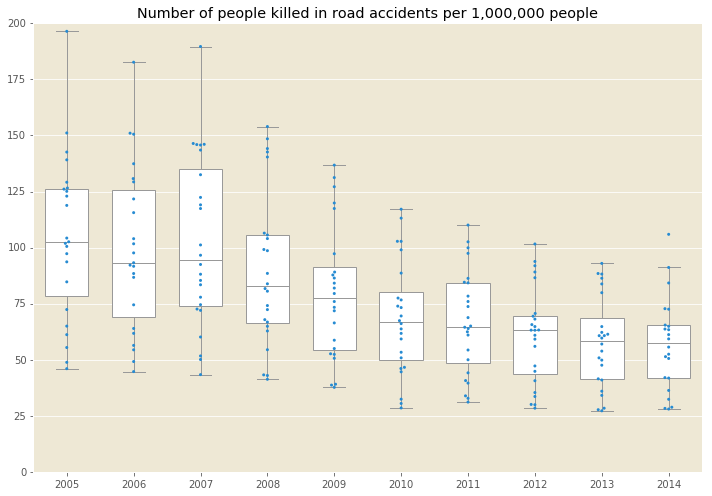

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data=df_mil.Total.unstack(), ax=ax, color='w', linewidth=params['lw'], width=0.65, fliersize=0)
sns.swarmplot(data=df_mil.Total.unstack(), ax=ax, color=params['c'], size=params['size'])

medians = df_mil.Total.unstack().median()
xs = np.linspace(0, 1, len(medians)+1)
c = 0.02

for xl, xr, y in zip(xs, xs[1:], medians):
    ax.axhline(y, xl+c, xr-c, color=params['c'], alpha=0.8, lw=0.9)

_ = (ax.set_title('Number of people killed in road accidents per 1,000,000 people'),
     ax.set_xlabel(''),
     ax.set_ylim(0, 200),
     fig.tight_layout(),
     fig.savefig('./figures/eu-traffic/traffic_01.png')
    )

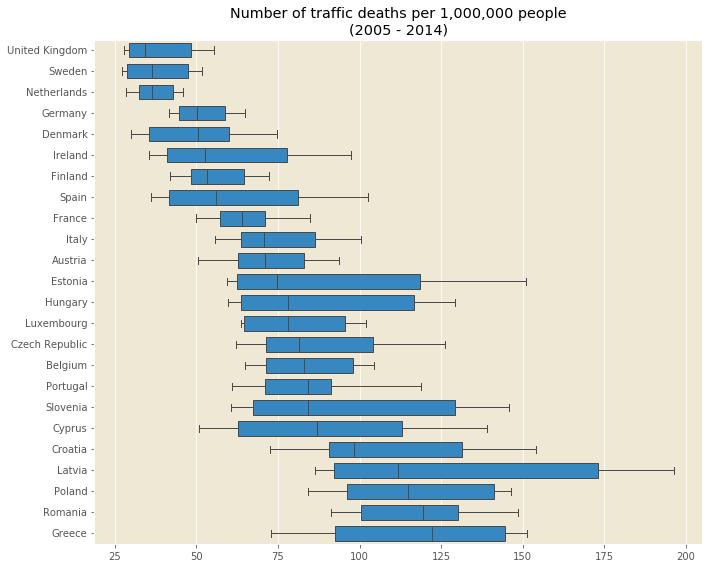

In [7]:
deaths = df_mil.Total.unstack(0)
order = deaths.median().sort_values().index

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=deaths, ax=ax, order=order, orient='h', 
            linewidth=params['lw'], saturation=params['sat'],
            fliersize=params['flier'], color=params['c'],
            width=params['width'],
           )

_ = (ax.set_title('Number of traffic deaths per 1,000,000 people\n'
                  '(2005 - 2014)'),
     ax.set_ylabel(''),
     fig.tight_layout(),
     fig.savefig('./figures/eu-traffic/traffic_02.png')
    )

## Deaths by different traffic roles

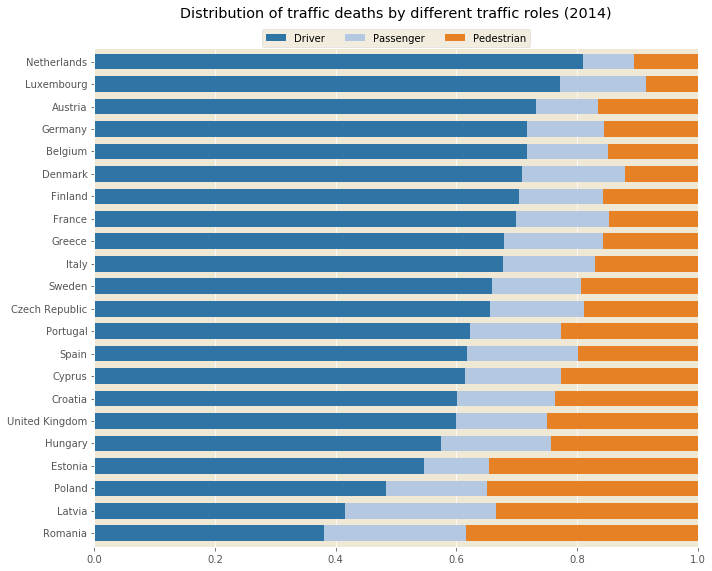

In [8]:
roles = df_mil[['Driver', 'Passenger', 'Pedestrian']].unstack(0)
roles = roles.loc[2014].unstack(0).dropna()
roles = roles.div(roles.sum(1), axis=0)

fig, ax = plt.subplots(figsize=(10, 8))
roles.sort_values(by='Driver').plot(kind='barh', ax=ax, stacked=True, 
                                       width=0.7, legend=False)

_ = (
    ax.set_xlim(0, 1),
    ax.legend(loc=10, bbox_to_anchor=(0.5, 1.02), ncol=3),
    ax.set_ylabel(''), 
    ax.set_title('Distribution of traffic deaths by different traffic roles (2014)', y=1.05),
    fig.tight_layout(),
    fig.savefig('./figures/eu-traffic/traffic_03.png')
)

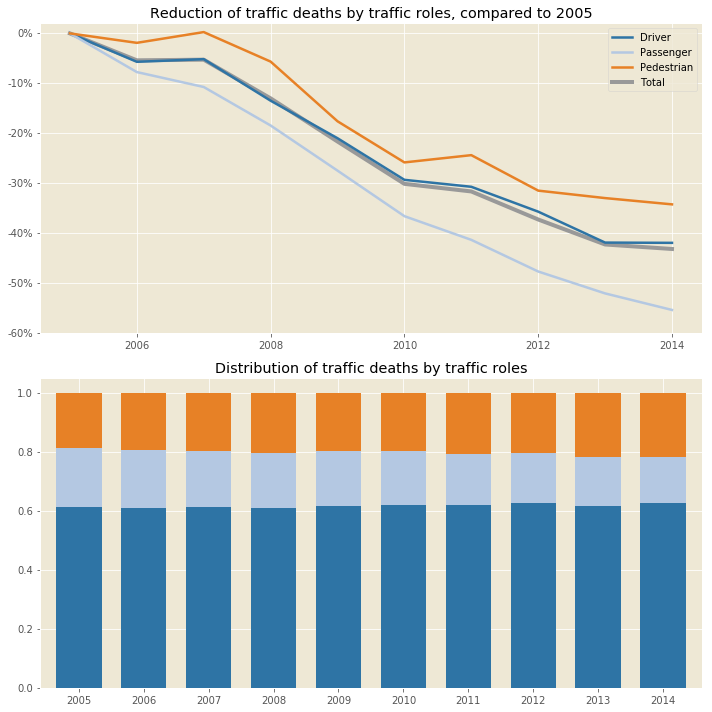

In [9]:
role_groups = df[['Driver', 'Passenger', 'Pedestrian', 'Total']]
role_groups = role_groups.unstack().sum().unstack(0)

role_groups_1 = role_groups.div(role_groups.loc[2005]) - 1
role_groups_2 = (role_groups.drop('Total', axis=1)
                 .div(role_groups.drop('Total', axis=1).sum(1), axis=0))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

for col in role_groups_1.columns:
    if col == 'Total':
        role_groups_1[col].plot(ax=ax1, color='#999999', lw=4, zorder=1)
    else:
        role_groups_1[col].plot(ax=ax1, zorder=2, lw=2.5)

        
role_groups_2.plot(ax=ax2, kind='bar', stacked=True, 
                   legend=False, width=0.7)

_ = (
    ax1.set_xlabel(''),
    ax2.set_xlabel(''),
    ax1.legend(),
    ax1.set_ylim(-0.6, 0.02),
    ax1.set_yticklabels(['{:.0f}%'.format(i*100) for i in np.linspace(-0.6, 0, 7)]),
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0),
    ax1.set_title('Reduction of traffic deaths by traffic roles, compared to 2005'),
    ax2.set_title('Distribution of traffic deaths by traffic roles'),  
    fig.tight_layout(),
    fig.savefig('./figures/eu-traffic/traffic_04.png')
)

### Pedestrians

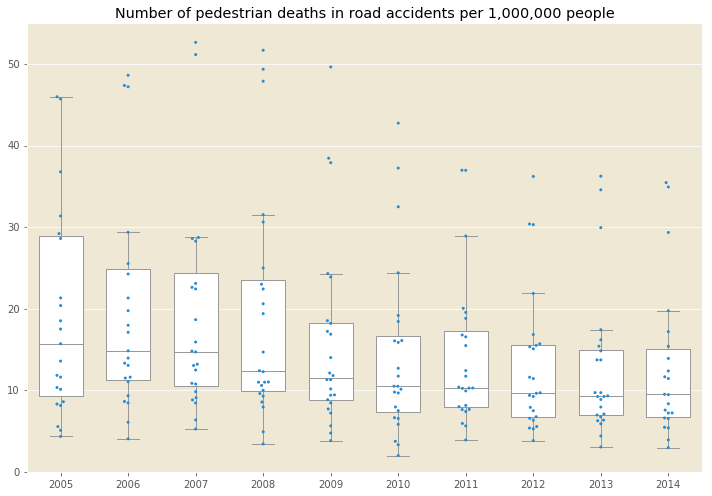

In [10]:
pedestrians1 = df_mil.Pedestrian.unstack()

fig, ax = plt.subplots(figsize=(10, 7))
sns.swarmplot(data=pedestrians1, ax=ax, 
              color=params['c'], size=params['size'],
             )

sns.boxplot(data=pedestrians1, ax=ax, 
            color='w', linewidth=params['lw'], 
            width=0.65, fliersize=0,
           )

medians = pedestrians1.median()
xs = np.linspace(0, 1, len(medians)+1)
c = 0.02

for xl, xr, y in zip(xs, xs[1:], medians):
    ax.axhline(y, xl+c, xr-c, color=params['c'], alpha=0.8, lw=0.9)

_ = (ax.set_title('Number of pedestrian deaths in road accidents per 1,000,000 people'),
     ax.set_xlabel(''),
     ax.set_ylim(0, 55), ##
     fig.tight_layout(),
     fig.savefig('./figures/eu-traffic/traffic_05.png')
    )

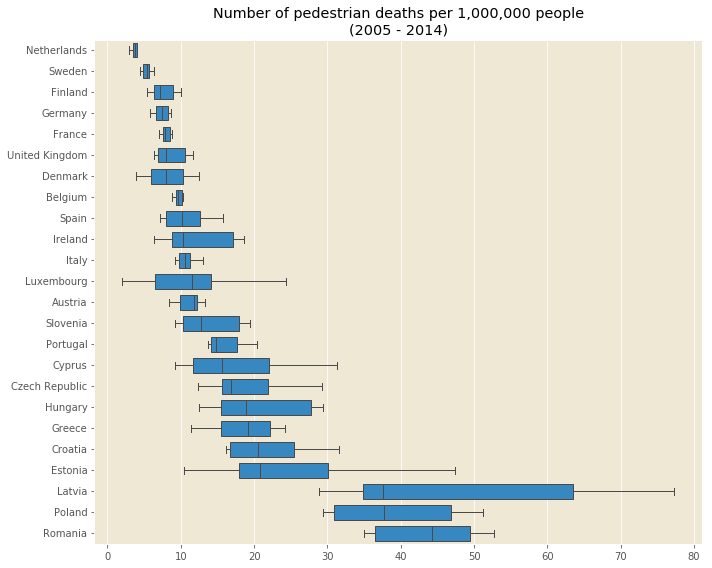

In [11]:
pedestrians2 = df_mil.Pedestrian.unstack(0)
order = pedestrians2.median().sort_values().index

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=pedestrians2, ax=ax, order=order, orient='h', 
            linewidth=params['lw'], saturation=params['sat'],
            fliersize=params['flier'], color=params['c'],
            width=params['width']
           )

_ = (ax.set_title('Number of pedestrian deaths per 1,000,000 people\n'
                  '(2005 - 2014)'),
     ax.set_ylabel(''),
     fig.tight_layout(),
     fig.savefig('./figures/eu-traffic/traffic_06.png')
    )

## Sex and age

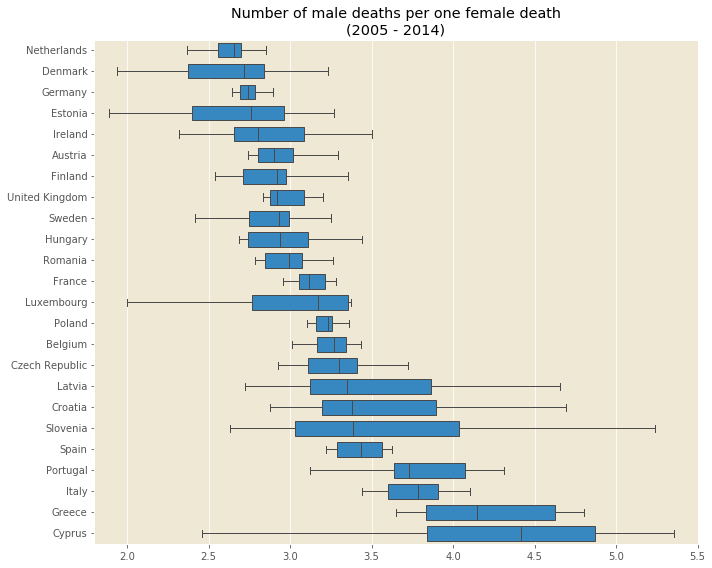

In [12]:
mf_ratio = df.mf_ratio.unstack(0)
order = mf_ratio.median().sort_values().index

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=mf_ratio, ax=ax, order=order, orient='h', 
            linewidth=params['lw'], saturation=params['sat'],
            fliersize=params['flier'], color=params['c'],
            width=params['width']
           )

_ = (ax.set_xlim(1.8, 5.5),
     ax.set_title('Number of male deaths per one female death\n'
                  '(2005 - 2014)'),
     ax.set_ylabel(''),
     fig.tight_layout(),
     fig.savefig('./figures/eu-traffic/traffic_07.png')
    )

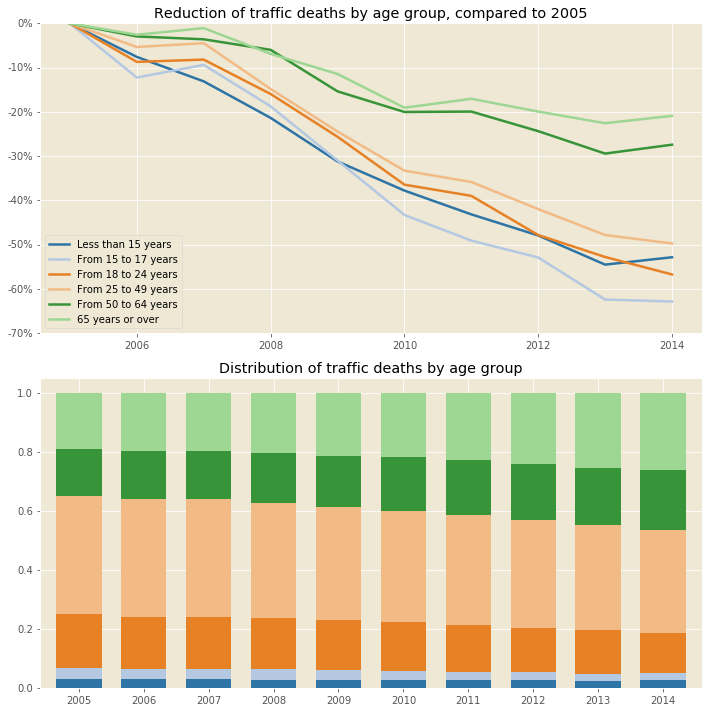

In [13]:
age_groups = df[['Less than 15 years', 'From 15 to 17 years', 
                     'From 18 to 24 years', 'From 25 to 49 years', 
                     'From 50 to 64 years', '65 years or over']]
age_groups = age_groups.unstack().sum().unstack(0)

age_groups_1 = age_groups.div(age_groups.loc[2005], axis=1) - 1
age_groups_2 = age_groups.div(age_groups.sum(1), axis=0)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

age_groups_1.plot(ax=ax1, lw=2.5)
age_groups_2.plot(ax=ax2, kind='bar', stacked=True, 
                  legend=False, width=0.7)

_ = (
    ax1.set_xlabel(''),
    ax2.set_xlabel(''),
    ax1.set_ylim(-0.7, 0),
    ax1.set_yticklabels(['{:.0f}%'.format(i*100) for i in np.linspace(-0.7, 0, 8)]),
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0),
    ax1.set_title('Reduction of traffic deaths by age group, compared to 2005'),
    ax2.set_title('Distribution of traffic deaths by age group'),  
    fig.tight_layout(),
    fig.savefig('./figures/eu-traffic/traffic_08.png')
)